In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("spam2.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
df.shape

(5572, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
print(df.isna().sum())

Category    0
Message     0
dtype: int64


In [8]:
df1=df.where((pd.notnull(df)),'')

In [9]:
df1.isnull().sum(axis=0)

Category    0
Message     0
dtype: int64

In [13]:
df1.loc[df1['Category']=='spam','Category',]=0
df1.loc[df1['Category']=='ham','Category',]=1

In [14]:
x1=df1['Message']
x2=df1['Category']

In [15]:
x1

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [16]:
x2

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

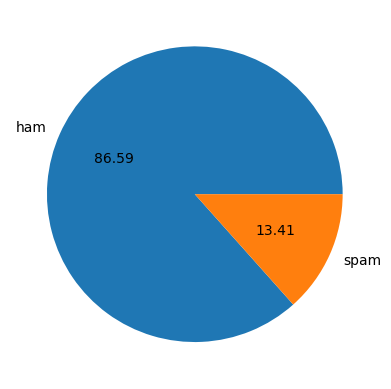

In [17]:
import matplotlib.pyplot as plt
plt.pie(df["Category"].value_counts(), labels = ["ham", "spam"], autopct = "%0.2f")
plt.show()

In [18]:
x1_train,x1_test,x2_train,x2_test = train_test_split(x1,x2,test_size=0.2,random_state=3)

In [19]:
x1.shape

(1115,)

In [20]:
x1_train.shape

(4457,)

In [21]:
x1_test.shape

(1115,)

In [22]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')
x1_train_feature=feature_extraction.fit_transform(x1_train)
x1_test_feature=feature_extraction.transform(x1_test)

x2_train= x2_train.astype('int')
x2_test=x2_test.astype('int')

In [23]:
print(x1_train_feature)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [24]:
model=LogisticRegression()

In [25]:
model.fit(x1_train_feature,x2_train)

LogisticRegression()

In [26]:
prediction_training=model.predict(x1_train_feature)
accuracy_train=accuracy_score(x2_train,prediction_training)

In [27]:
print(accuracy_train)

0.9670181736594121


In [28]:
prediction_testing=model.predict(x1_test_feature)
accuracy_test=accuracy_score(x2_test,prediction_testing)

In [29]:
print(accuracy_test)

0.9659192825112107


In [30]:
input_mail=["I sincerely appreciate your flexibility and willingness to help. I wanted to express my personal gratitude for the effort and extra time you have contributed. Thank you for your support"]
input_feature=feature_extraction.transform(input_mail)
prediction=model.predict(input_feature)
print(prediction)
            
if (prediction[0]==1):
  print('ham mail')
else:
  print('spam mail')

[1]
ham mail
